In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = str(1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dataloader import *
from model import *
from utilities import *
from retrain_fun import *
import random
random.seed(0)
np.random.seed(0)
jax.random.PRNGKey(0)
os.environ["XLA_FLAGS"] = "--xla_gpu_deterministic_reductions --xla_gpu_autotune_level=2"
os.environ['TF_CUDNN_DETERMINISTIC']='1'


2023-07-26 10:32:59.564754: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data_aggregated, houses = data_preprocess(only_positive=True)

Train: [2361, 7719, 9019, 2335, 7951] 
Test:  [4373, 7901, 3456, 3538, 2818]

In [4]:
train_list= [[2361, 7719, 9019, 2335, 7951]]
test_list= [[4373, 7901, 3456, 3538, 2818]]
pool_list=[]
for i in range(len(train_list)):
    pool = [j for j in houses if j not in train_list[i]+test_list[i]]
    pool_list.append(pool)

In [5]:
appliance = 'refrigerator'

In [6]:
pool_list
d = {}
for i in pool_list[0]:
    d[i] = []

Train Set No: 1
Iteration No:  0


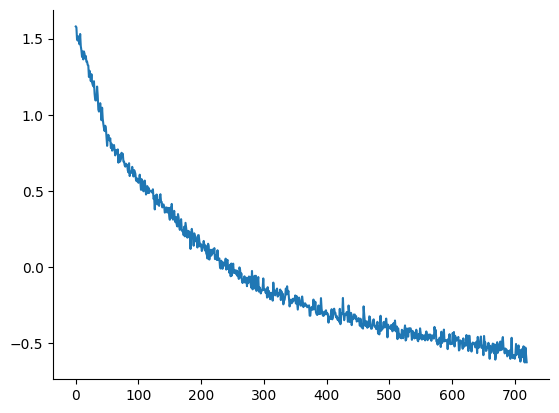

(10, 58739, 1)
RMSE : 80.3158 MAE  : 46.4278 NLL : 5.7735
2018-03-01 00:00:00-0600
2018-03-02 00:00:00-06:00
2018-03-02 00:00:00-06:00
2018-03-03 00:00:00-06:00
2018-03-03 00:00:00-06:00
2018-03-04 00:00:00-06:00
2018-03-04 00:00:00-06:00
2018-03-05 00:00:00-06:00
2018-03-05 00:00:00-06:00
2018-03-06 00:00:00-06:00
2018-03-06 00:00:00-06:00
2018-03-07 00:00:00-06:00
2018-03-07 00:00:00-06:00
2018-03-08 00:00:00-06:00
2018-03-08 00:00:00-06:00
2018-03-09 00:00:00-06:00
2018-03-09 00:00:00-06:00
2018-03-10 00:00:00-06:00
2018-03-10 00:00:00-06:00
2018-03-11 00:00:00-06:00
2018-03-11 00:00:00-06:00
2018-03-12 00:00:00-06:00
2018-03-12 00:00:00-06:00
2018-03-13 00:00:00-06:00
2018-03-13 00:00:00-06:00
2018-03-14 00:00:00-06:00
2018-03-14 00:00:00-06:00
2018-03-15 00:00:00-06:00
2018-03-15 00:00:00-06:00
2018-03-16 00:00:00-06:00
2018-03-01 00:00:00-0600
2018-03-02 00:00:00-06:00
2018-03-02 00:00:00-06:00
2018-03-03 00:00:00-06:00
2018-03-03 00:00:00-06:00
2018-03-04 00:00:00-06:00
2018-03-

/home/dhruv.patel/final_active/pos/retrain_fun.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278]


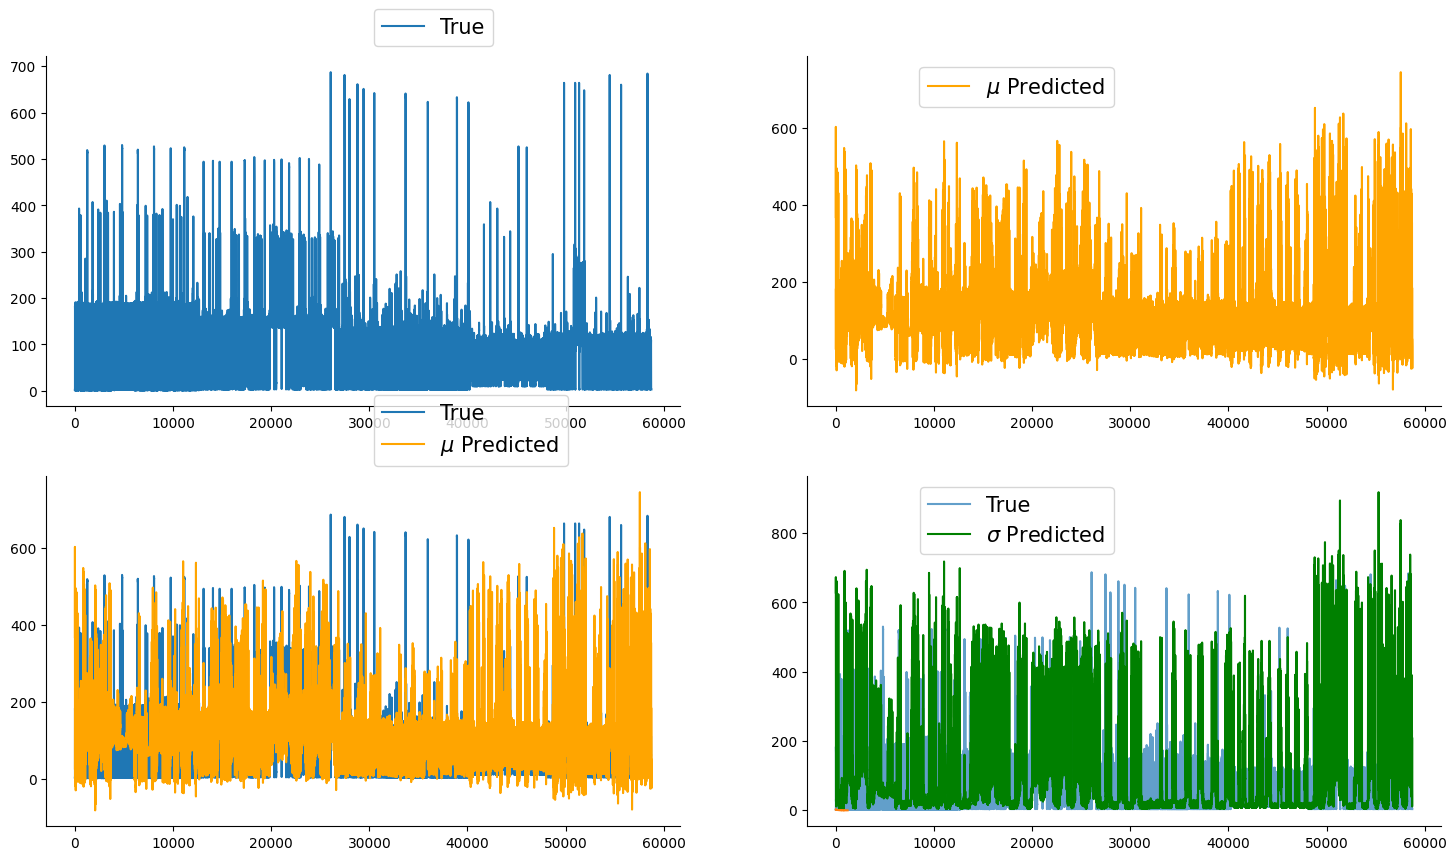

RMSE : 64.0465 MAE  : 38.6016 NLL : 5.3600
2018-03-06 00:00:00-0600
2018-03-07 00:00:00-06:00
2018-03-07 00:00:00-06:00
2018-03-08 00:00:00-06:00
2018-03-08 00:00:00-06:00
2018-03-09 00:00:00-06:00
2018-03-09 00:00:00-06:00
2018-03-10 00:00:00-06:00
2018-03-10 00:00:00-06:00
2018-03-11 00:00:00-06:00
2018-03-11 00:00:00-06:00
2018-03-12 00:00:00-06:00
2018-03-12 00:00:00-06:00
2018-03-13 00:00:00-06:00
2018-03-13 00:00:00-06:00
2018-03-14 00:00:00-06:00
2018-03-14 00:00:00-06:00
2018-03-15 00:00:00-06:00
2018-03-15 00:00:00-06:00
2018-03-16 00:00:00-06:00
2018-03-16 00:00:00-06:00
2018-03-17 00:00:00-06:00
2018-03-17 00:00:00-06:00
2018-03-18 00:00:00-06:00
2018-03-18 00:00:00-06:00
2018-03-19 00:00:00-06:00
2018-03-19 00:00:00-06:00
2018-03-20 00:00:00-06:00
2018-03-20 00:00:00-06:00
2018-03-21 00:00:00-06:00
2018-03-06 00:00:00-0600
2018-03-07 00:00:00-06:00
2018-03-07 00:00:00-06:00
2018-03-08 00:00:00-06:00
2018-03-08 00:00:00-06:00
2018-03-09 00:00:00-06:00
2018-03-09 00:00:00-06:

/home/dhruv.patel/final_active/pos/retrain_fun.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565]


2023-07-26 10:40:17.357296: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[118349,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[118349,40,99]{2,1,0}, f32[50,40,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-26 10:40:18.262389: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[118349,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[118349,50,99]{2,1,0}, f32[50,50,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


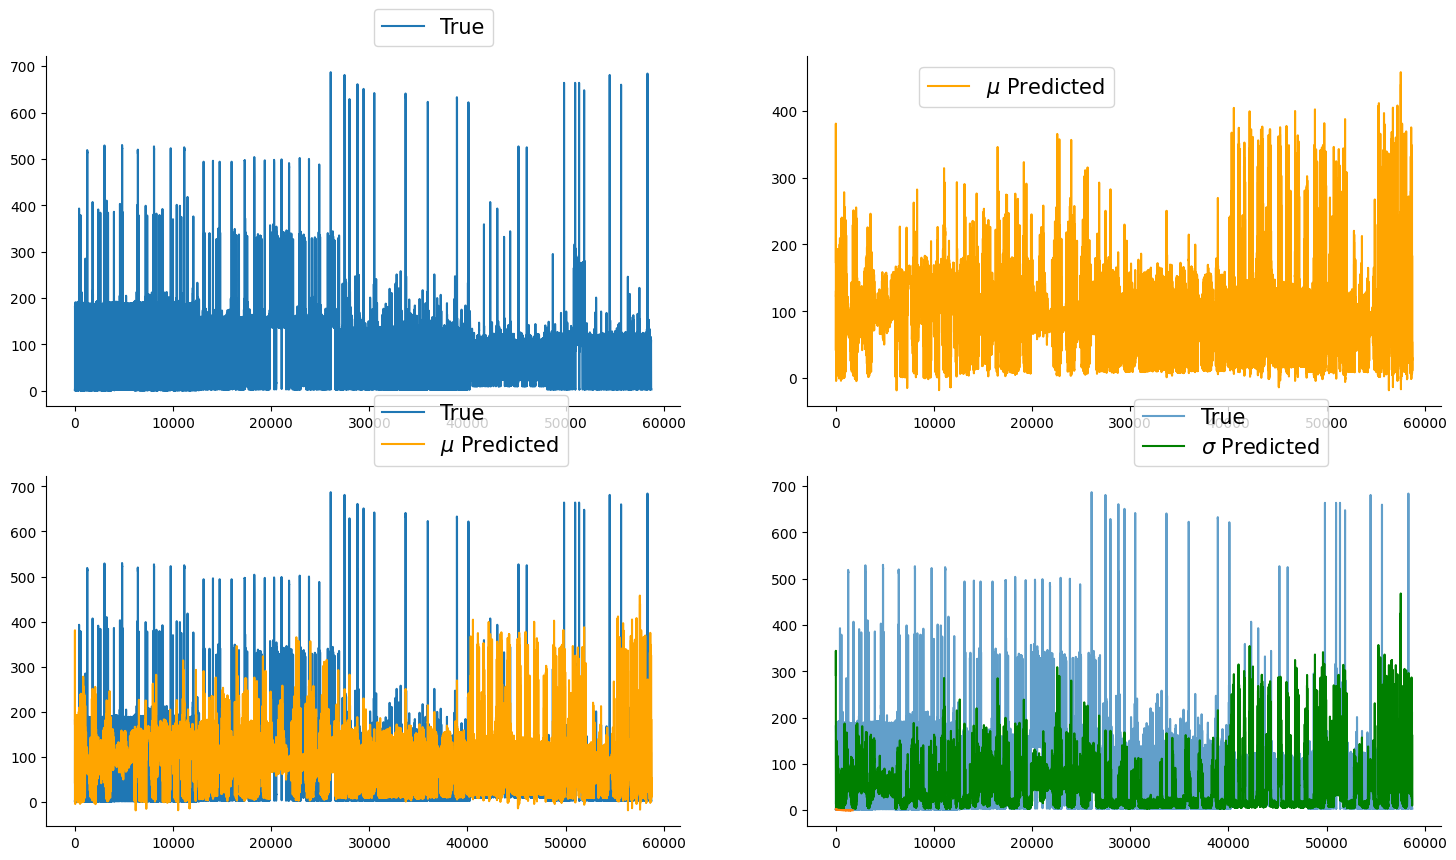

RMSE : 59.0754 MAE  : 32.2778 NLL : 5.4668
2018-03-11 00:00:00-0600
2018-03-12 00:00:00-06:00
2018-03-12 00:00:00-06:00
2018-03-13 00:00:00-06:00
2018-03-13 00:00:00-06:00
2018-03-14 00:00:00-06:00
2018-03-14 00:00:00-06:00
2018-03-15 00:00:00-06:00
2018-03-15 00:00:00-06:00
2018-03-16 00:00:00-06:00
2018-03-16 00:00:00-06:00
2018-03-17 00:00:00-06:00
2018-03-17 00:00:00-06:00
2018-03-18 00:00:00-06:00
2018-03-18 00:00:00-06:00
2018-03-19 00:00:00-06:00
2018-03-19 00:00:00-06:00
2018-03-20 00:00:00-06:00
2018-03-20 00:00:00-06:00
2018-03-21 00:00:00-06:00
2018-03-21 00:00:00-06:00
2018-03-22 00:00:00-06:00
2018-03-22 00:00:00-06:00
2018-03-23 00:00:00-06:00
2018-03-23 00:00:00-06:00
2018-03-24 00:00:00-06:00
2018-03-24 00:00:00-06:00
2018-03-25 00:00:00-06:00
2018-03-25 00:00:00-06:00
2018-03-26 00:00:00-06:00
2018-03-11 00:00:00-0600
2018-03-12 00:00:00-06:00
2018-03-12 00:00:00-06:00
2018-03-13 00:00:00-06:00
2018-03-13 00:00:00-06:00
2018-03-14 00:00:00-06:00
2018-03-14 00:00:00-06:

/home/dhruv.patel/final_active/pos/retrain_fun.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 1642]


2023-07-26 10:42:34.769001: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[167554,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[167554,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-26 10:42:35.667993: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[167554,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[167554,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-26 10:

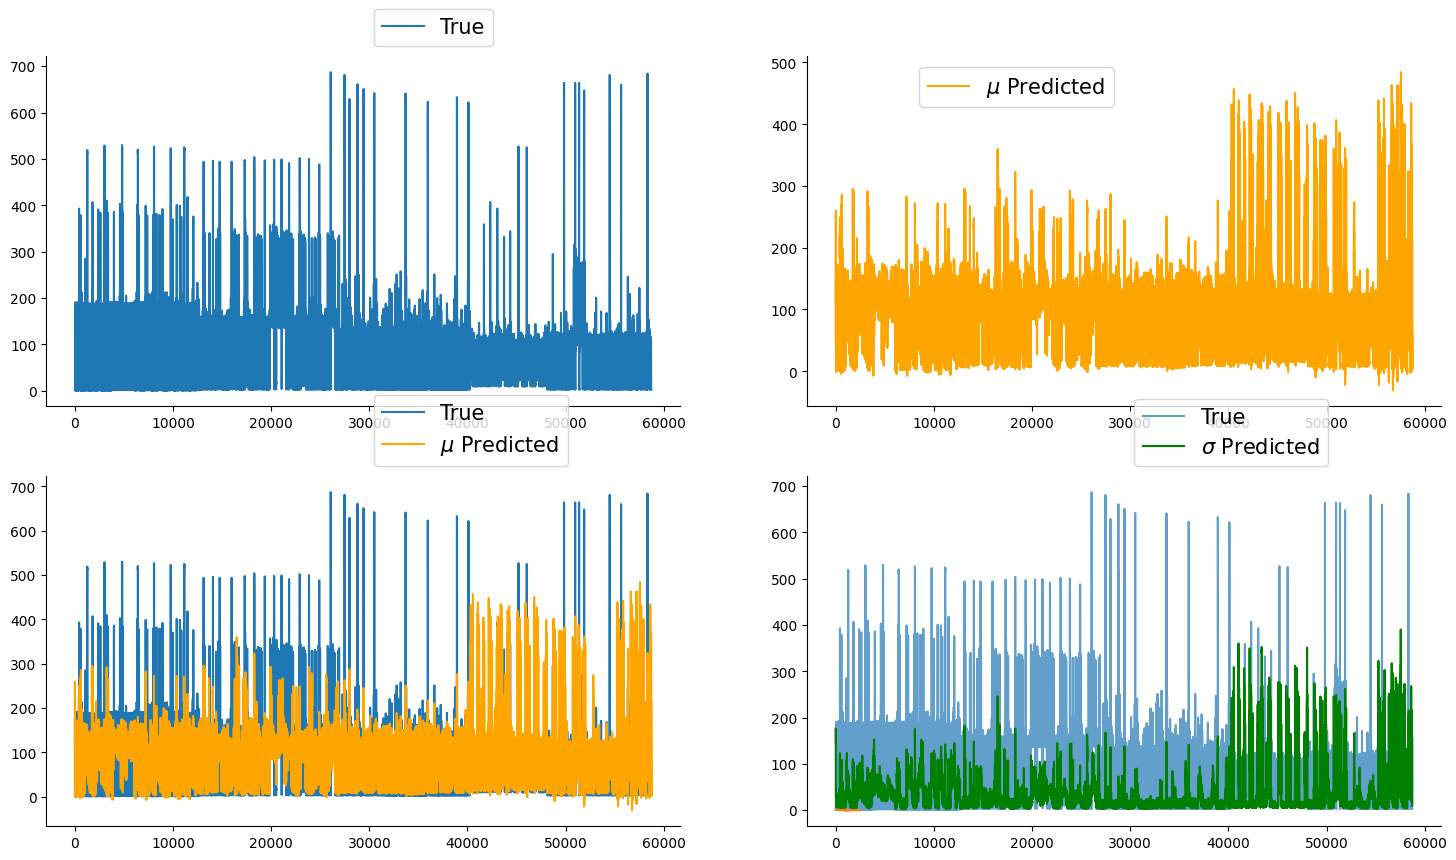

RMSE : 57.6610 MAE  : 31.1123 NLL : 5.4873
2018-03-16 00:00:00-0600
2018-03-17 00:00:00-06:00
2018-03-17 00:00:00-06:00
2018-03-18 00:00:00-06:00
2018-03-18 00:00:00-06:00
2018-03-19 00:00:00-06:00
2018-03-19 00:00:00-06:00
2018-03-20 00:00:00-06:00
2018-03-20 00:00:00-06:00
2018-03-21 00:00:00-06:00
2018-03-21 00:00:00-06:00
2018-03-22 00:00:00-06:00
2018-03-22 00:00:00-06:00
2018-03-23 00:00:00-06:00
2018-03-23 00:00:00-06:00
2018-03-24 00:00:00-06:00
2018-03-24 00:00:00-06:00
2018-03-25 00:00:00-06:00
2018-03-25 00:00:00-06:00
2018-03-26 00:00:00-06:00
2018-03-26 00:00:00-06:00
2018-03-27 00:00:00-06:00
2018-03-27 00:00:00-06:00
2018-03-28 00:00:00-06:00
2018-03-28 00:00:00-06:00
2018-03-29 00:00:00-06:00
2018-03-29 00:00:00-06:00
2018-03-30 00:00:00-06:00
2018-03-30 00:00:00-06:00
2018-03-31 00:00:00-06:00
2018-03-16 00:00:00-0600
2018-03-17 00:00:00-06:00
2018-03-17 00:00:00-06:00
2018-03-18 00:00:00-06:00
2018-03-18 00:00:00-06:00
2018-03-19 00:00:00-06:00
2018-03-19 00:00:00-06:

/home/dhruv.patel/final_active/pos/retrain_fun.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 1642 8156]


2023-07-26 10:44:42.948020: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[232649,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[232649,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-26 10:44:44.115285: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[232649,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[232649,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-26 10:

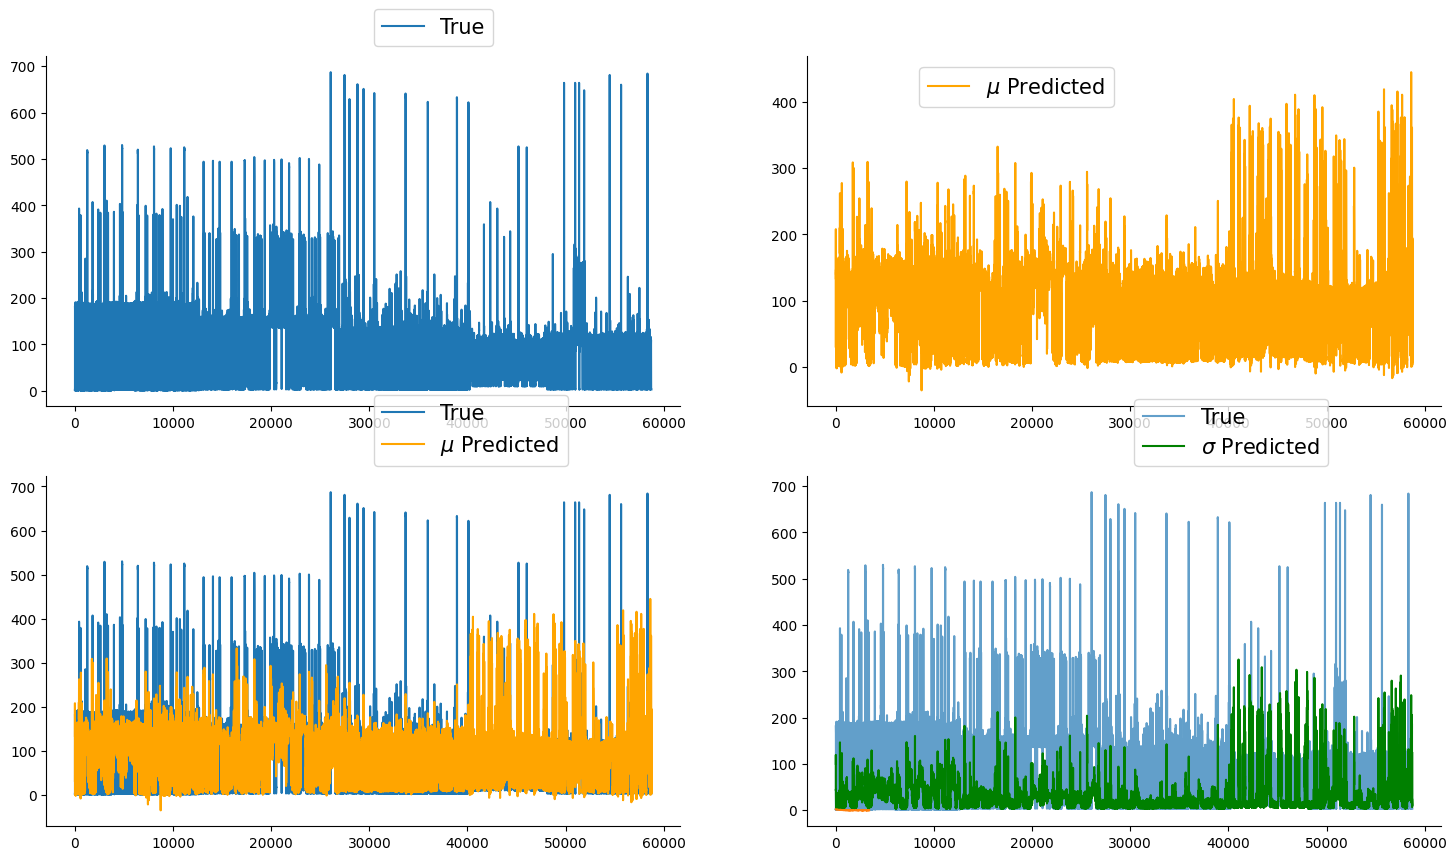

RMSE : 54.8590 MAE  : 29.6342 NLL : 5.7579
2018-03-21 00:00:00-0600
2018-03-22 00:00:00-06:00
2018-03-22 00:00:00-06:00
2018-03-23 00:00:00-06:00
2018-03-23 00:00:00-06:00
2018-03-24 00:00:00-06:00
2018-03-24 00:00:00-06:00
2018-03-25 00:00:00-06:00
2018-03-25 00:00:00-06:00
2018-03-26 00:00:00-06:00
2018-03-26 00:00:00-06:00
2018-03-27 00:00:00-06:00
2018-03-27 00:00:00-06:00
2018-03-28 00:00:00-06:00
2018-03-28 00:00:00-06:00
2018-03-29 00:00:00-06:00
2018-03-29 00:00:00-06:00
2018-03-30 00:00:00-06:00
2018-03-30 00:00:00-06:00
2018-03-31 00:00:00-06:00
2018-03-31 00:00:00-06:00
2018-04-01 00:00:00-06:00
2018-04-01 00:00:00-06:00
2018-04-02 00:00:00-06:00
2018-04-02 00:00:00-06:00
2018-04-03 00:00:00-06:00
2018-04-03 00:00:00-06:00
2018-04-04 00:00:00-06:00
2018-04-04 00:00:00-06:00
2018-04-05 00:00:00-06:00
2018-03-21 00:00:00-0600
2018-03-22 00:00:00-06:00
2018-03-22 00:00:00-06:00
2018-03-23 00:00:00-06:00
2018-03-23 00:00:00-06:00
2018-03-24 00:00:00-06:00
2018-03-24 00:00:00-06:

/home/dhruv.patel/final_active/pos/retrain_fun.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 1642 8156  661]


2023-07-26 10:46:45.233019: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[292740,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[292740,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-26 10:46:48.217338: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[292740,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[292740,40,99]{2,1,0}, f32[50,40,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07

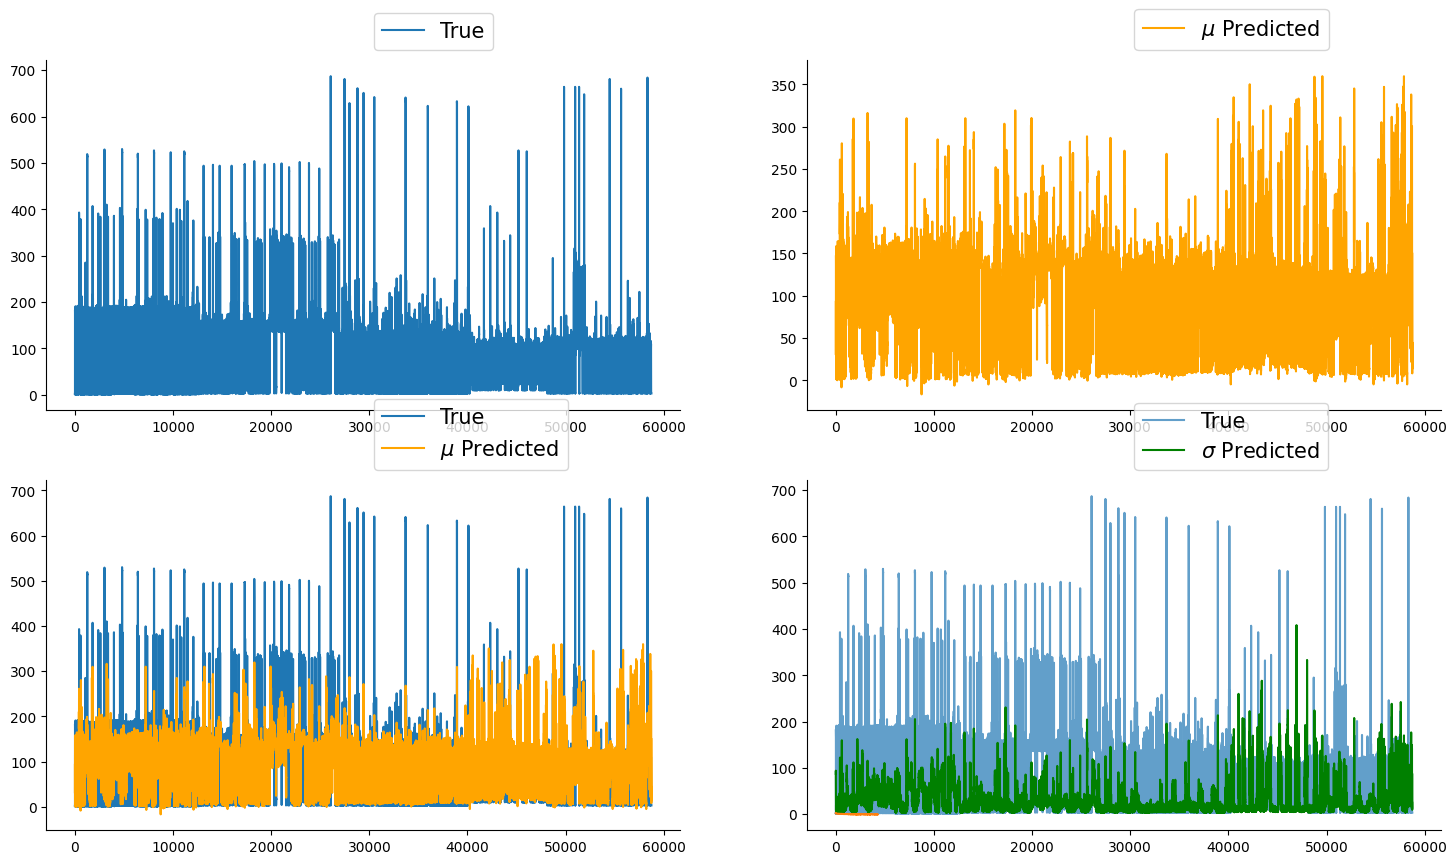

RMSE : 53.5217 MAE  : 28.3904 NLL : 5.9601
2018-03-27 00:00:00-0600
2018-03-28 00:00:00-06:00
2018-03-28 00:00:00-06:00
2018-03-29 00:00:00-06:00
2018-03-29 00:00:00-06:00
2018-03-30 00:00:00-06:00
2018-03-30 00:00:00-06:00
2018-03-31 00:00:00-06:00
2018-03-31 00:00:00-06:00
2018-04-01 00:00:00-06:00
2018-04-01 00:00:00-06:00
2018-04-02 00:00:00-06:00
2018-04-02 00:00:00-06:00
2018-04-03 00:00:00-06:00
2018-04-03 00:00:00-06:00
2018-04-04 00:00:00-06:00
2018-04-04 00:00:00-06:00
2018-04-05 00:00:00-06:00
2018-04-05 00:00:00-06:00
2018-04-06 00:00:00-06:00
2018-04-06 00:00:00-06:00
2018-04-07 00:00:00-06:00
2018-04-07 00:00:00-06:00
2018-04-08 00:00:00-06:00
2018-04-08 00:00:00-06:00
2018-04-09 00:00:00-06:00
2018-04-09 00:00:00-06:00
2018-04-10 00:00:00-06:00
2018-04-10 00:00:00-06:00
2018-04-11 00:00:00-06:00
2018-03-27 00:00:00-0600
2018-03-28 00:00:00-06:00
2018-03-28 00:00:00-06:00
2018-03-29 00:00:00-06:00
2018-03-29 00:00:00-06:00
2018-03-30 00:00:00-06:00
2018-03-30 00:00:00-06:

/home/dhruv.patel/final_active/pos/retrain_fun.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 1642 8156  661 7800]


2023-07-26 10:48:40.902982: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[358710,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[358710,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-26 10:48:42.648434: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[358710,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[358710,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-26 10:

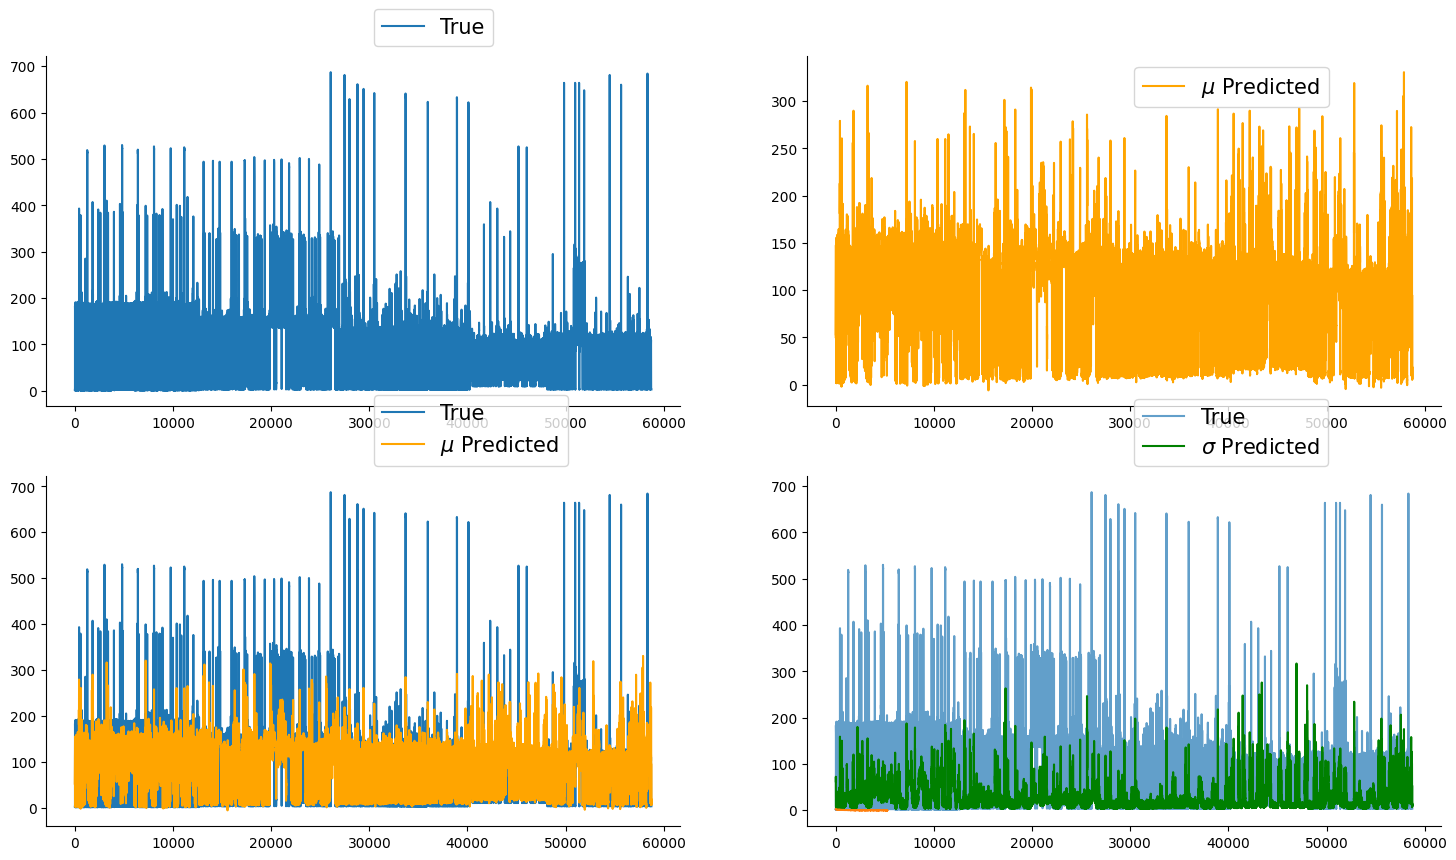

RMSE : 52.7790 MAE  : 27.6606 NLL : 5.7180
2018-04-01 00:00:00-0600
2018-04-02 00:00:00-06:00
2018-04-02 00:00:00-06:00
2018-04-03 00:00:00-06:00
2018-04-03 00:00:00-06:00
2018-04-04 00:00:00-06:00
2018-04-04 00:00:00-06:00
2018-04-05 00:00:00-06:00
2018-04-05 00:00:00-06:00
2018-04-06 00:00:00-06:00
2018-04-06 00:00:00-06:00
2018-04-07 00:00:00-06:00
2018-04-07 00:00:00-06:00
2018-04-08 00:00:00-06:00
2018-04-08 00:00:00-06:00
2018-04-09 00:00:00-06:00
2018-04-09 00:00:00-06:00
2018-04-10 00:00:00-06:00
2018-04-10 00:00:00-06:00
2018-04-11 00:00:00-06:00
2018-04-11 00:00:00-06:00
2018-04-12 00:00:00-06:00
2018-04-12 00:00:00-06:00
2018-04-13 00:00:00-06:00
2018-04-13 00:00:00-06:00
2018-04-14 00:00:00-06:00
2018-04-14 00:00:00-06:00
2018-04-15 00:00:00-06:00
2018-04-15 00:00:00-06:00
2018-04-16 00:00:00-06:00
2018-04-01 00:00:00-0600
2018-04-02 00:00:00-06:00
2018-04-02 00:00:00-06:00
2018-04-03 00:00:00-06:00
2018-04-03 00:00:00-06:00
2018-04-04 00:00:00-06:00
2018-04-04 00:00:00-06:

/home/dhruv.patel/final_active/pos/retrain_fun.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 1642 8156  661 7800 5746]


2023-07-26 10:50:31.931142: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[426402,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[426402,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-26 10:50:33.986308: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[426402,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[426402,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


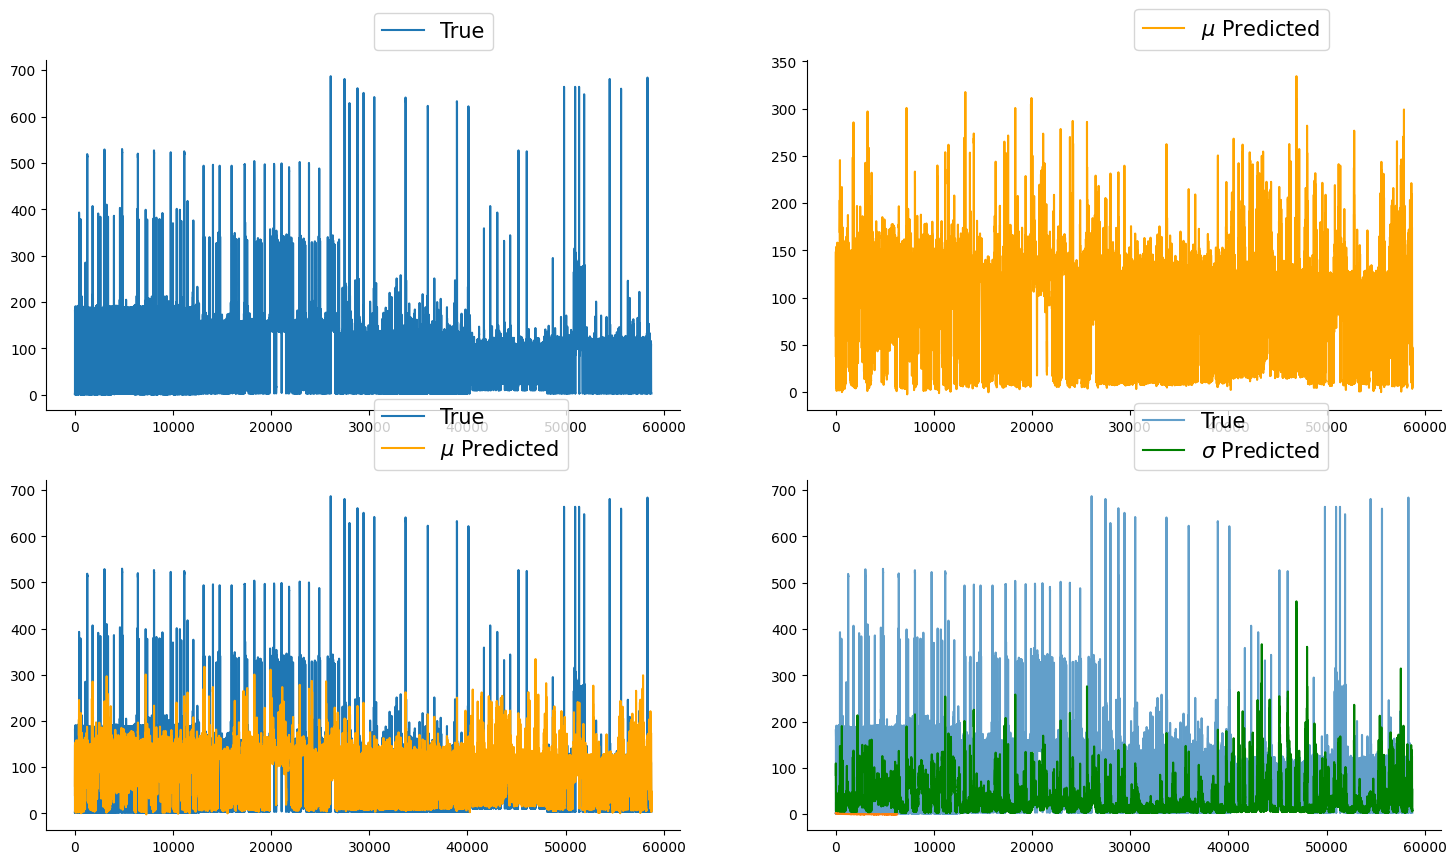

RMSE : 52.6718 MAE  : 27.5812 NLL : 5.7811
2018-04-06 00:00:00-0600
2018-04-07 00:00:00-06:00
2018-04-07 00:00:00-06:00
2018-04-08 00:00:00-06:00
2018-04-08 00:00:00-06:00
2018-04-09 00:00:00-06:00
2018-04-09 00:00:00-06:00
2018-04-10 00:00:00-06:00
2018-04-10 00:00:00-06:00
2018-04-11 00:00:00-06:00
2018-04-11 00:00:00-06:00
2018-04-12 00:00:00-06:00
2018-04-12 00:00:00-06:00
2018-04-13 00:00:00-06:00
2018-04-13 00:00:00-06:00
2018-04-14 00:00:00-06:00
2018-04-14 00:00:00-06:00
2018-04-15 00:00:00-06:00
2018-04-15 00:00:00-06:00
2018-04-16 00:00:00-06:00
2018-04-16 00:00:00-06:00
2018-04-17 00:00:00-06:00
2018-04-17 00:00:00-06:00
2018-04-18 00:00:00-06:00
2018-04-18 00:00:00-06:00
2018-04-19 00:00:00-06:00
2018-04-19 00:00:00-06:00
2018-04-20 00:00:00-06:00
2018-04-20 00:00:00-06:00
2018-04-21 00:00:00-06:00
2018-04-06 00:00:00-0600
2018-04-07 00:00:00-06:00
2018-04-07 00:00:00-06:00
2018-04-08 00:00:00-06:00
2018-04-08 00:00:00-06:00
2018-04-09 00:00:00-06:00
2018-04-09 00:00:00-06:

/home/dhruv.patel/final_active/pos/retrain_fun.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 1642 8156  661 7800 5746 7536]


2023-07-26 10:52:15.660991: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[500846,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[500846,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-26 10:52:18.063385: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[500846,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[500846,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


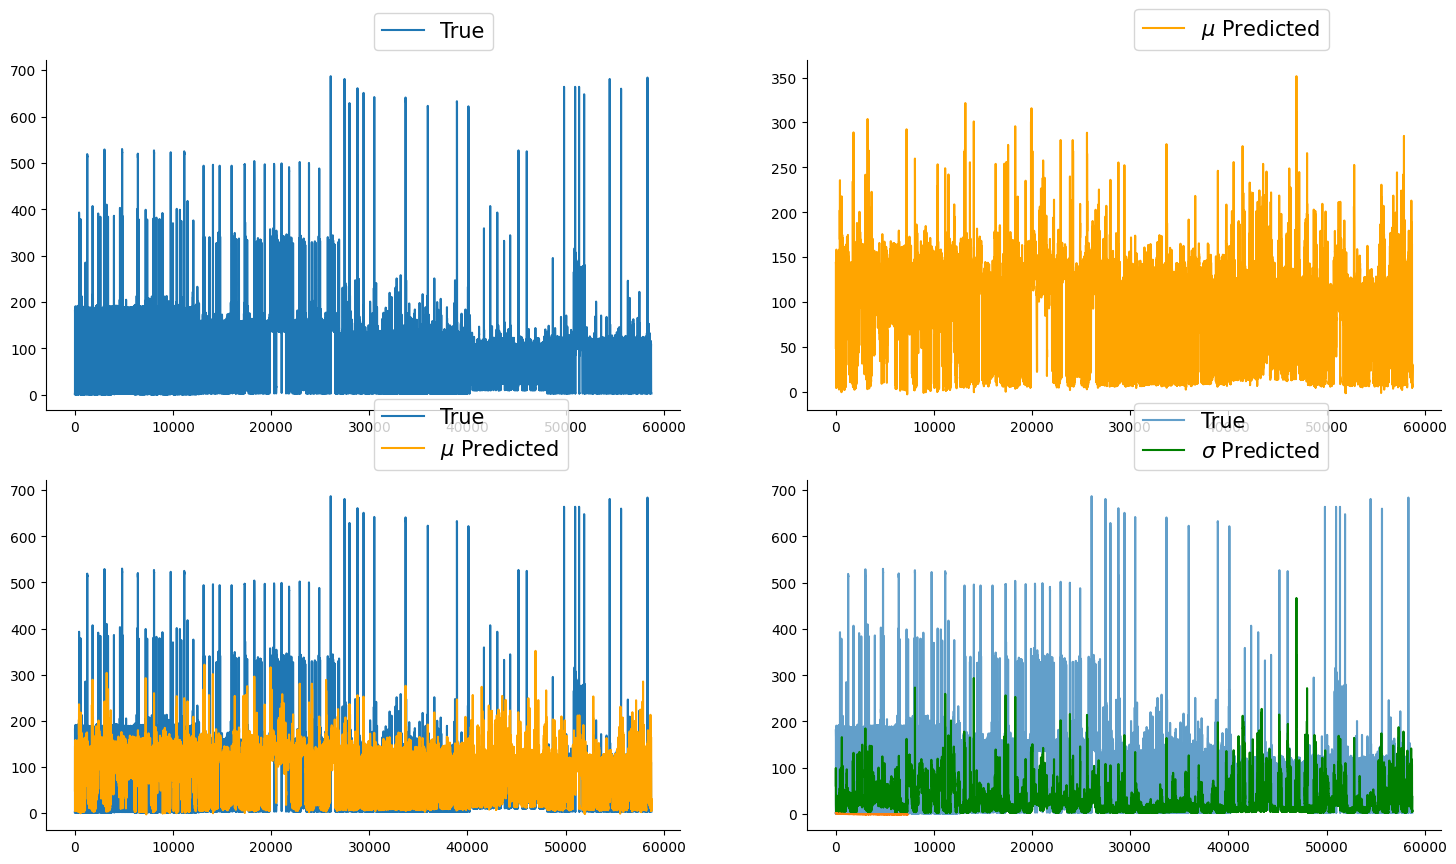

RMSE : 51.4277 MAE  : 26.4198 NLL : 5.2998
2018-04-11 00:00:00-0600
2018-04-12 00:00:00-06:00
2018-04-12 00:00:00-06:00
2018-04-13 00:00:00-06:00
2018-04-13 00:00:00-06:00
2018-04-14 00:00:00-06:00
2018-04-14 00:00:00-06:00
2018-04-15 00:00:00-06:00
2018-04-15 00:00:00-06:00
2018-04-16 00:00:00-06:00
2018-04-16 00:00:00-06:00
2018-04-17 00:00:00-06:00
2018-04-17 00:00:00-06:00
2018-04-18 00:00:00-06:00
2018-04-18 00:00:00-06:00
2018-04-19 00:00:00-06:00
2018-04-19 00:00:00-06:00
2018-04-20 00:00:00-06:00
2018-04-20 00:00:00-06:00
2018-04-21 00:00:00-06:00
2018-04-21 00:00:00-06:00
2018-04-22 00:00:00-06:00
2018-04-22 00:00:00-06:00
2018-04-23 00:00:00-06:00
2018-04-23 00:00:00-06:00
2018-04-24 00:00:00-06:00
2018-04-24 00:00:00-06:00
2018-04-25 00:00:00-06:00
2018-04-25 00:00:00-06:00
2018-04-26 00:00:00-06:00
2018-04-11 00:00:00-0600
2018-04-12 00:00:00-06:00
2018-04-12 00:00:00-06:00
2018-04-13 00:00:00-06:00
2018-04-13 00:00:00-06:00
2018-04-14 00:00:00-06:00
2018-04-14 00:00:00-06:

/home/dhruv.patel/final_active/pos/retrain_fun.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 9278 8565 1642 8156  661 7800 5746 7536 8386]


2023-07-26 10:53:59.648813: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[582213,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[582213,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-07-26 10:54:02.452176: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[582213,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[582213,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


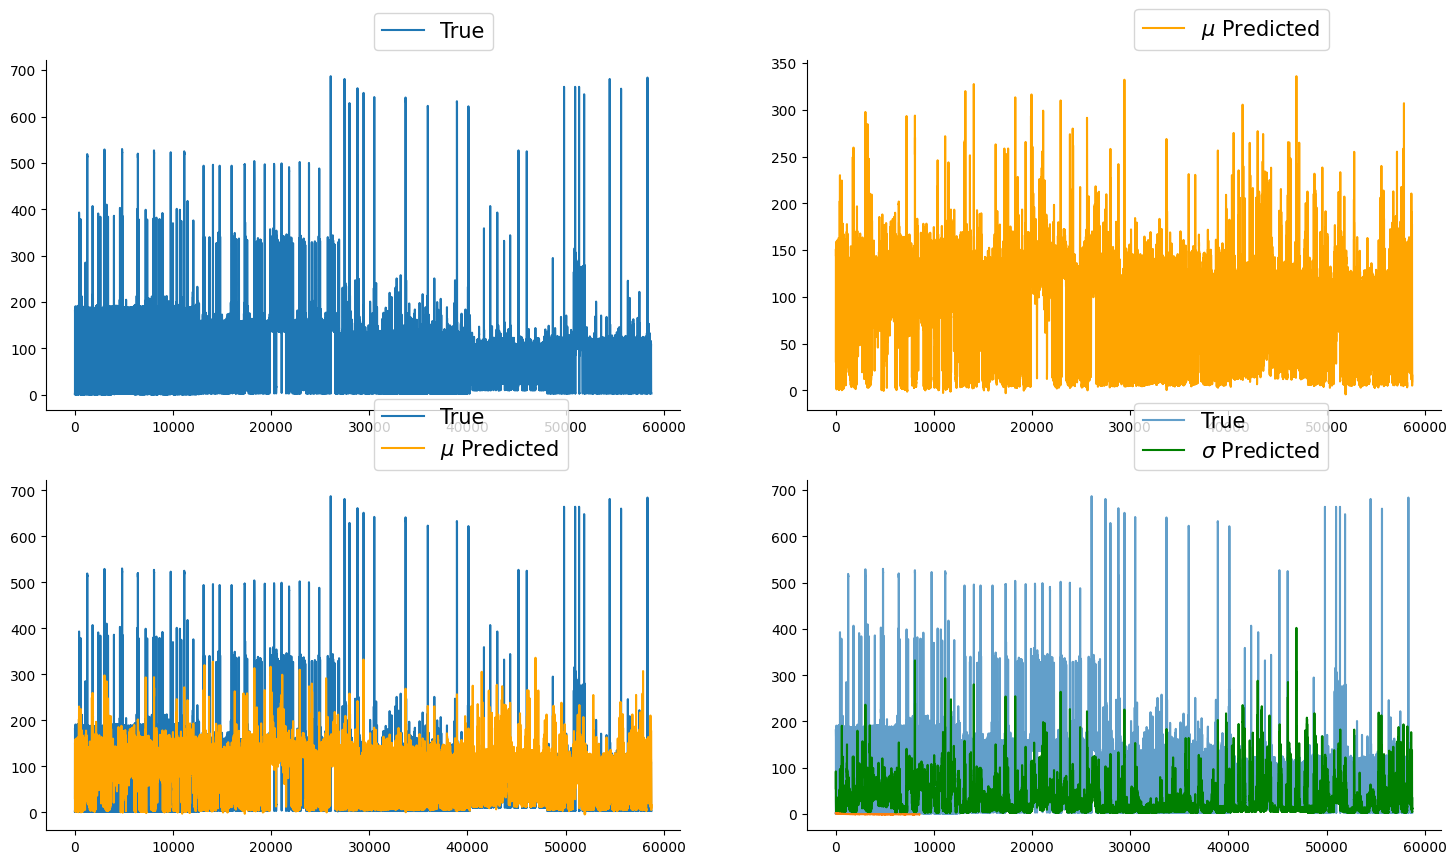

RMSE : 50.3938 MAE  : 25.6824 NLL : 5.5105
2018-04-16 00:00:00-0600
2018-04-17 00:00:00-06:00
2018-04-17 00:00:00-06:00
2018-04-18 00:00:00-06:00
2018-04-18 00:00:00-06:00
2018-04-19 00:00:00-06:00
2018-04-19 00:00:00-06:00
2018-04-20 00:00:00-06:00
2018-04-20 00:00:00-06:00
2018-04-21 00:00:00-06:00
2018-04-21 00:00:00-06:00
2018-04-22 00:00:00-06:00
2018-04-22 00:00:00-06:00
2018-04-23 00:00:00-06:00
2018-04-23 00:00:00-06:00
2018-04-24 00:00:00-06:00
2018-04-24 00:00:00-06:00
2018-04-25 00:00:00-06:00
2018-04-25 00:00:00-06:00
2018-04-26 00:00:00-06:00
2018-04-26 00:00:00-06:00
2018-04-27 00:00:00-06:00
2018-04-27 00:00:00-06:00
2018-04-28 00:00:00-06:00
2018-04-28 00:00:00-06:00
2018-04-29 00:00:00-06:00
2018-04-29 00:00:00-06:00
2018-04-30 00:00:00-06:00
2018-04-30 00:00:00-06:00
2018-05-01 00:00:00-06:00


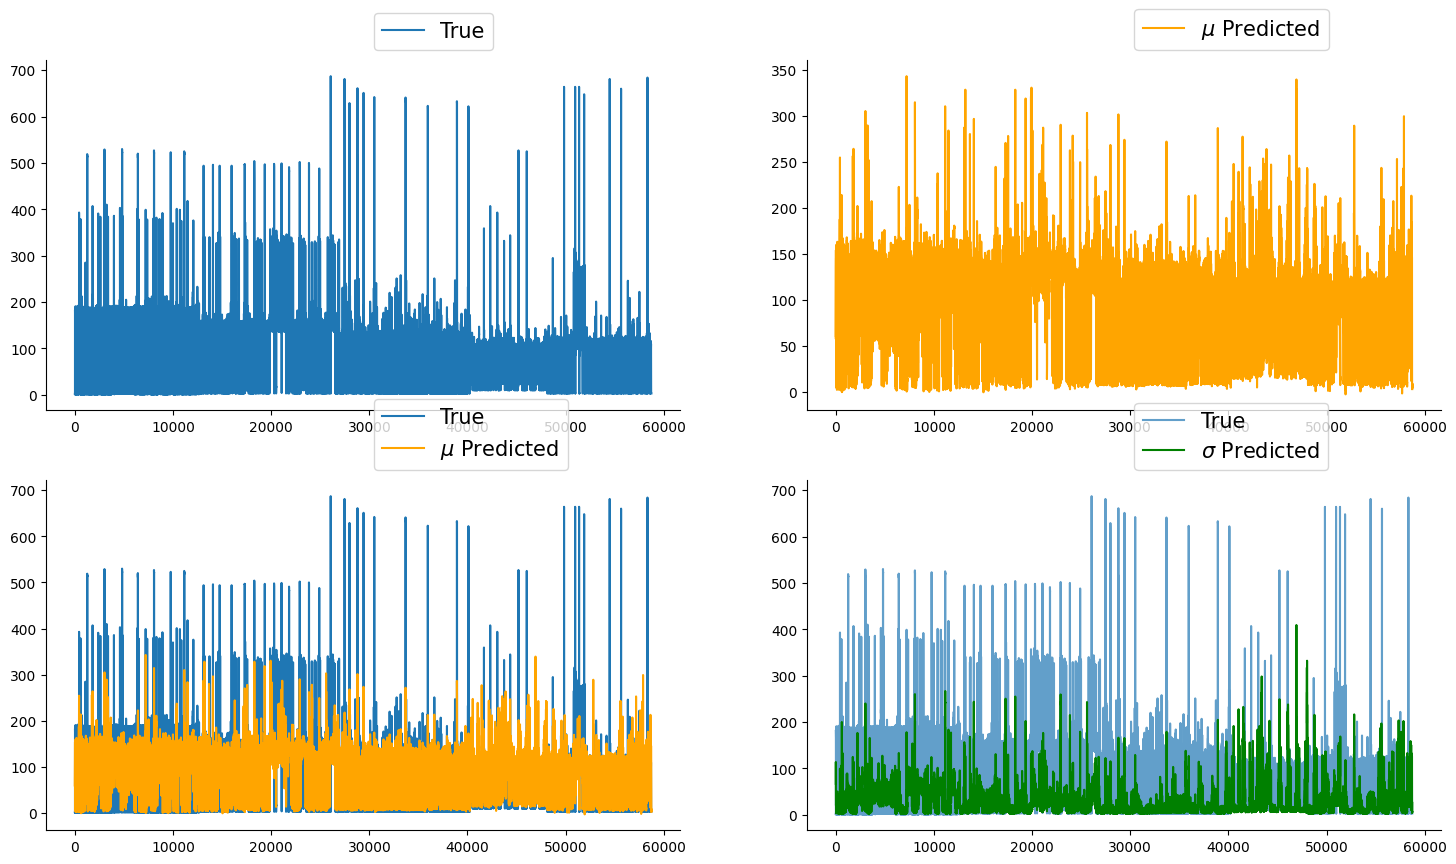

In [7]:
total_rmse=[]
total_mae = []
houseids=[]
for i in range(len(train_list)):
    # print(len(train_list))
    print("Train Set No:", i+1)
    train_houses = train_list[i]
    test_houses = test_list[i]
    pool_houses = pool_list[i]
    train = data_aggregated[data_aggregated["dataid"].isin(train_houses)] 
    test = data_aggregated[data_aggregated["dataid"].isin(test_houses)]

    
    rmse_iter=[]
    mae_iter = []
    houses=[]
    sigma_list = []
    start= ["2018-03-01 00:00:00-06","2018-03-11 00:00:00-06", "2018-03-16 00:00:00-06", "2018-03-21 00:00:00-06", "2018-03-26 00:00:00-06", "2018-04-01 00:00:00-06","2018-04-06 00:00:00-06","2018-04-11 00:00:00-06","2018-04-16 00:00:00-06","2018-04-21 00:00:00-06"]
    end= ["2018-03-10 23:59:00-06","2018-03-15 23:59:00-06","2018-03-20 23:59:00-06","2018-03-25 23:59:00-06","2018-03-31 23:59:00-06","2018-04-05 23:59:00-06", "2018-04-10 23:59:00-06", "2018-04-15 23:59:00-06", "2018-04-20 23:59:00-06", "2018-04-25 23:59:00-06"]
    dates = ["2018-03-01 00:00:00-06","2018-03-06 00:00:00-06", "2018-03-11 00:00:00-06", "2018-03-16 00:00:00-06", "2018-03-21 00:00:00-06", "2018-03-27 00:00:00-06","2018-04-01 00:00:00-06","2018-04-06 00:00:00-06","2018-04-11 00:00:00-06","2018-04-16 00:00:00-06"]
    for j in range(len(start)):
        # print(len(start))
        print("Iteration No: ",j)
        if(j==0):
            house, houseid,rmsee, train, test, maee, sigmaa= retrain(0, start[j], end[j], pool_houses, train, test, dates[j], appliance, data_aggregated)
            rmse_iter.append(rmsee.item())
            mae_iter.append(maee.item())
            houses.append(house)
            pool_houses= np.delete(pool_houses, houseid)
            sigma_list.append(sigmaa.item())
        elif(j==10):
            house, houseid,rmsee, train, test, maee, sigmaa= retrain(house, start[j], end[j], pool_houses, train, test, dates[j], appliance, data_aggregated)
            rmse_iter.append(rmsee.item())
            mae_iter.append(maee.item())
            sigma_list.append(sigmaa.item())
        else:
            house, houseid,rmsee, train, test, maee, sigmaa= retrain(house, start[j], end[j], pool_houses, train, test, dates[j], appliance, data_aggregated)
            rmse_iter.append(rmsee.item())
            mae_iter.append(maee.item())
            houses.append(house)
            pool_houses= np.delete(pool_houses, houseid)
            sigma_list.append(sigmaa.item())
    total_rmse.append(rmse_iter)
    total_mae.append(mae_iter)
    houseids.append(houses)

In [8]:
houseids

[[9278, 8565, 1642, 8156, 661, 7800, 5746, 7536, 8386, 9160]]

In [9]:
total_rmse

[[80.31578826904297,
  64.0465316772461,
  59.075374603271484,
  57.661014556884766,
  54.85897445678711,
  53.521724700927734,
  52.778953552246094,
  52.67181396484375,
  51.42765808105469,
  50.39375686645508]]

In [10]:
# d = pd.DataFrame(total_rmse)
# d2 = pd.DataFrame(total_mae)
# house_df= pd.DataFrame(houseids)
# if not os.path.exists(f'{appliance}'):
#     os.mkdir(f'{appliance}')

# # Save the DataFrame to a CSV file
# d.to_csv(os.path.join(f'{appliance}', "new_rmse.csv"), index=False)
# d2.to_csv(os.path.join(f'{appliance}', "new_mae.csv"), index=False)
# house_df.to_csv(os.path.join(f'{appliance}', "new_houseids.csv"), index=False)

Text(0.5, 1.0, 'air')

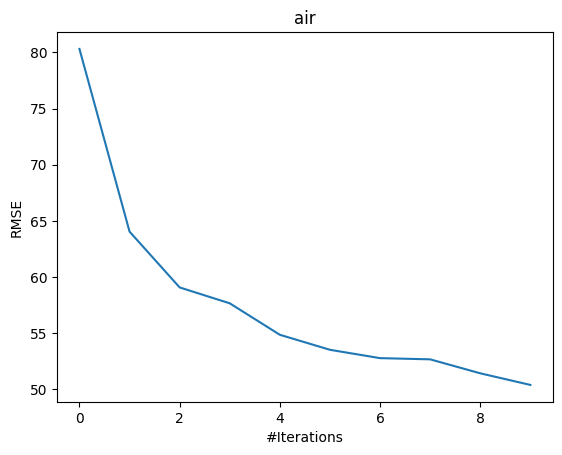

In [11]:
plt.plot(total_rmse[0])

plt.xlabel("#Iterations")
plt.ylabel("RMSE")
plt.title("air")



In [12]:
max_length = max(len(lst) for lst in d.values())

# Add NaN values to lists with shorter lengths
for key in d:
    d[key] += [np.nan] * (max_length - len(d[key]))

# Convert dictionary to DataFrame
df = pd.DataFrame(d)

print(df)


Empty DataFrame
Columns: [5746, 8565, 9278, 8156, 8386, 9160, 661, 1642, 7536, 7800]
Index: []


In [13]:
sigma_list

[96.28367614746094,
 39.56278610229492,
 28.499658584594727,
 25.79953384399414,
 24.31184959411621,
 22.384071350097656,
 23.856853485107422,
 22.85988426208496,
 24.815380096435547,
 23.145891189575195]

In [14]:
d = pd.DataFrame(sigma_list)
d.to_csv('refrigerator_sigma.csv')

: 